# PREDICTION OF FOREX PRICES  USING THE CNN-LSTM 
# CURRENCY PAIR : EURUSD

IMPORTING REQUIRED PYTHON LYBRARIES AND SETTING DESIRED PLOTTING STYLE

In [6]:
# Importing all the required python Libraries
import numpy as np
import pandas as pd 
import yfinance as yf
import matplotlib.pyplot as plt 
import os
plt.style.use('seaborn-whitegrid')
#plt.style.use('fivethirtyeight')
#plt.style.use('dark_background')

IMPORTING HISTORY DATASETS OF EUR VS USD FOREX

In [2]:
#df=yf.download(tickers='EURUSD=X',start='2003-12-31',interval ='1d')

In [3]:
#df.to_csv("EURUSD_csv")

In [7]:
url = r"EURUSD_csv"
## Read dataset to pandas dataframe
df = pd.read_csv(url, index_col = 'Date')

In [8]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-12-30,1.248595,1.256297,1.248299,1.254894,1.254894,0
2003-12-31,1.255004,1.264894,1.253007,1.259002,1.259002,0
2004-01-01,1.259002,1.260796,1.247396,1.258194,1.258194,0
2004-01-02,1.258194,1.262802,1.252693,1.258194,1.258194,0
2004-01-05,1.263903,1.269406,1.263695,1.268698,1.268698,0


In [6]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-22,1.212445,1.215510,1.209219,1.212636,1.212636,0
2021-02-23,1.216693,1.217878,1.213681,1.216680,1.216680,0
2021-02-24,1.215200,1.217404,1.211130,1.215214,1.215214,0
2021-02-25,1.216951,1.224155,1.215658,1.217137,1.217137,0
2021-02-26,1.216012,1.218249,1.209175,1.216042,1.216042,0


In [7]:
#get the number of rows and columns in the data set
df.shape

(4430, 6)

PREDICTION IS DONE USING CLOSING PRICE ONLY, SO TAKING OUT ONLY THE CLOSE PRICES

In [9]:
data = df.filter(['Close']).values
data

array([[1.25489402],
       [1.25900185],
       [1.25819397],
       ...,
       [1.21521449],
       [1.21713722],
       [1.21604204]])

PLOTTING THE CLOSE PRICES OF HISTORY DATASETS

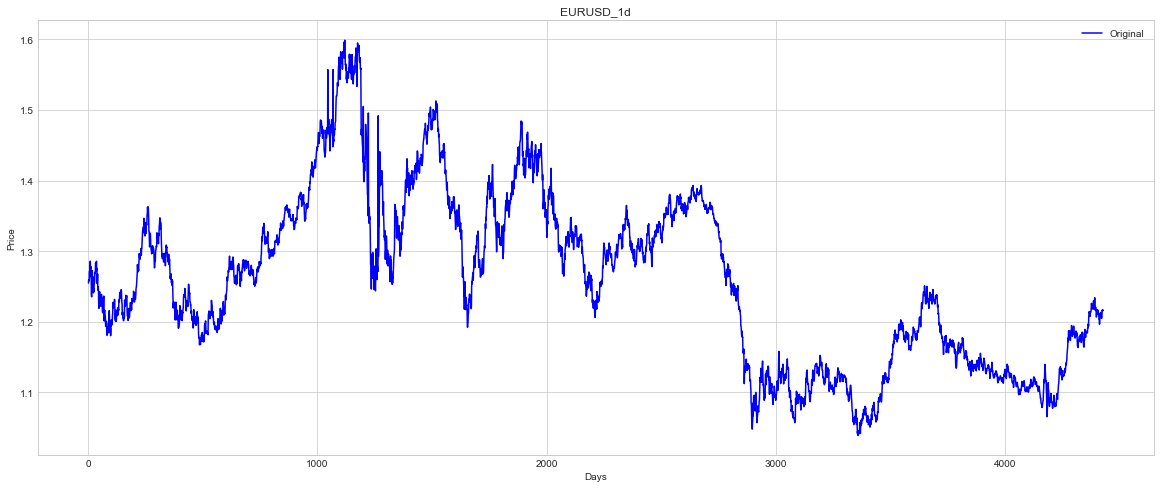

In [9]:
plt.figure(figsize = (20,8))
plt.plot(data,'b',label = 'Original')
plt.xlabel("Days")
plt.ylabel('Price')
plt.title("EURUSD_1d")
plt.legend()

DATA PREPROCESSING USING SCIKIT LEARN PYTHON LIBRARY

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

scaled_data

array([[0.38561231],
       [0.39295099],
       [0.39150771],
       ...,
       [0.31472442],
       [0.31815939],
       [0.31620285]])

DATA SPLITTING INTO TRAINING, AND TESTING DATA SETS

In [11]:
training_size = int(len(scaled_data)*0.80) #Training size is 80% of the given data
print("Training_size:",training_size)
x_train_1 = scaled_data[0:training_size,:]
print(len(x_train_1))
test_data_1= scaled_data[training_size:,:1]
print(len(test_data_1))

Training_size: 3544
3544
886


In [12]:
print(len(x_train_1)), print(test_data_1)

3544
[[0.27397819]
 [0.27463882]
 [0.29273562]
 [0.29069538]
 [0.28029633]
 [0.28300828]
 [0.26800016]
 [0.27354629]
 [0.27631765]
 [0.28027078]
 [0.28621516]
 [0.26469659]
 [0.27782057]
 [0.27453724]
 [0.26175464]
 [0.24932281]
 [0.2428162 ]
 [0.24855378]
 [0.25312665]
 [0.23998371]
 [0.24244648]
 [0.24417366]
 [0.23615368]
 [0.24153455]
 [0.24138675]
 [0.25447239]
 [0.26351377]
 [0.25749442]
 [0.25432289]
 [0.25083766]
 [0.24679466]
 [0.25096203]
 [0.26039931]
 [0.24353177]
 [0.24451952]
 [0.24449481]
 [0.25552041]
 [0.22273687]
 [0.21689834]
 [0.22549865]
 [0.2253287 ]
 [0.22121372]
 [0.22712509]
 [0.21875244]
 [0.2183429 ]
 [0.21627306]
 [0.21552788]
 [0.22445596]
 [0.2270037 ]
 [0.22768413]
 [0.2505395 ]
 [0.24778539]
 [0.23963955]
 [0.24131285]
 [0.24059898]
 [0.25444748]
 [0.26145329]
 [0.27441009]
 [0.27055451]
 [0.26039931]
 [0.2611019 ]
 [0.26936508]
 [0.26250813]
 [0.26391628]
 [0.2576944 ]
 [0.25257889]
 [0.24684407]
 [0.24644816]
 [0.2478101 ]
 [0.24155925]
 [0.25821979]
 

(None, None)

In [12]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
       # find the end of this pattern
       end_ix = i + n_steps
       # check if we are beyond the sequence
       if end_ix > len(sequence)-1:
          break
       # gather input and output parts of the pattern
       seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
       X.append(seq_x)
       y.append(seq_y)
    return np.array(X), np.array(y)

In [13]:
#Split into samples
time_step = 120
x_train, y_train = split_sequence(x_train_1, time_step)
x_test, y_test = split_sequence(test_data_1, time_step)


In [15]:
print(x_train.shape),print(y_train.shape)

(3424, 120, 1)
(3424, 1)


(None, None)

In [16]:
print(x_test[-1]), print(y_test[-2:])

[[0.25616975]
 [0.25944692]
 [0.264319  ]
 [0.25974763]
 [0.2524296 ]
 [0.26042444]
 [0.25994803]
 [0.24609655]
 [0.23544322]
 [0.2265422 ]
 [0.2291681 ]
 [0.22239825]
 [0.23016671]
 [0.24146065]
 [0.2386073 ]
 [0.24197795]
 [0.23760059]
 [0.25046518]
 [0.24067267]
 [0.24600263]
 [0.24591851]
 [0.25482166]
 [0.25469686]
 [0.24148535]
 [0.24180566]
 [0.2352228 ]
 [0.23671763]
 [0.2462501 ]
 [0.2571443 ]
 [0.26145329]
 [0.25449752]
 [0.26047449]
 [0.25350041]
 [0.24897546]
 [0.24264369]
 [0.23014222]
 [0.22360813]
 [0.22372931]
 [0.24506301]
 [0.23978693]
 [0.25494646]
 [0.26842972]
 [0.2566943 ]
 [0.25517093]
 [0.24829354]
 [0.25241959]
 [0.25989798]
 [0.26243274]
 [0.26318686]
 [0.26032413]
 [0.26368968]
 [0.26368968]
 [0.25944692]
 [0.26976993]
 [0.27325197]
 [0.27253639]
 [0.28244497]
 [0.27649591]
 [0.30083141]
 [0.30801761]
 [0.31356416]
 [0.3092245 ]
 [0.30775544]
 [0.30736252]
 [0.301613  ]
 [0.31332181]
 [0.31137634]
 [0.31414408]
 [0.31510968]
 [0.32319972]
 [0.33447811]
 [0.32

(None, None)

In [14]:
# reshape input to be [samples, time steps, features] which is required for LSTM
x_train =x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)

In [18]:
x_train.shape, x_test.shape

((3424, 120, 1), (766, 120, 1))

BUILDING A CNN-LSTM MODEL USING KERAS

In [19]:
import math
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv1D ,MaxPooling1D, Dropout
from keras.layers.recurrent import LSTM
from keras.utils.vis_utils import plot_model
from keras.metrics import RootMeanSquaredError as rmse
from keras import optimizers

In [20]:
# define model
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=2, activation='relu',padding = 'same',input_shape=(120,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100, return_sequences = True))
model.add(Dropout(0.3))
model.add(LSTM(100, return_sequences = False))
model.add(Dropout(0.3))
model.add(Dense(units=1, activation = 'sigmoid'))
model.compile(optimizer='adam', loss= 'mse' , metrics = [rmse()])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 120, 256)          768       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 60, 256)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 60, 100)           142800    
_________________________________________________________________
dropout (Dropout)            (None, 60, 100)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1

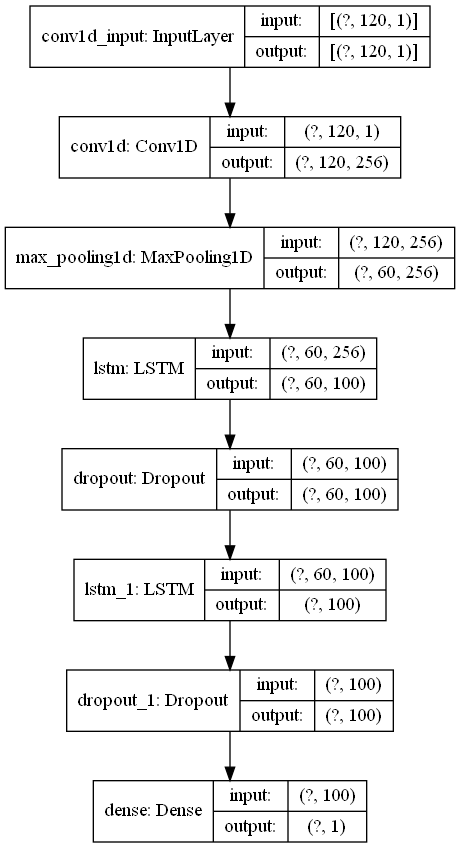

In [21]:
model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

TRAINING THE MODEL FOR 200 EPOCHS

In [22]:
history = model.fit(x_train, y_train, epochs = 250 , validation_data = (x_test,y_test), batch_size=32, verbose=1)

Epoch 1/250
107/107 [==============================] - 19s 182ms/step - loss: 0.0082 - root_mean_squared_error: 0.0905 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0377
Epoch 2/250
107/107 [==============================] - 16s 149ms/step - loss: 0.0021 - root_mean_squared_error: 0.0457 - val_loss: 9.5995e-04 - val_root_mean_squared_error: 0.0310
Epoch 3/250
107/107 [==============================] - 14s 131ms/step - loss: 0.0015 - root_mean_squared_error: 0.0388 - val_loss: 3.8760e-04 - val_root_mean_squared_error: 0.0197
Epoch 4/250
107/107 [==============================] - 15s 136ms/step - loss: 0.0012 - root_mean_squared_error: 0.0350 - val_loss: 3.4817e-04 - val_root_mean_squared_error: 0.0187
Epoch 5/250
107/107 [==============================] - 14s 132ms/step - loss: 0.0010 - root_mean_squared_error: 0.0322 - val_loss: 2.9248e-04 - val_root_mean_squared_error: 0.0171
Epoch 6/250
107/107 [==============================] - 14s 134ms/step - loss: 9.5695e-04 - root_mean_squ

107/107 [==============================] - 16s 153ms/step - loss: 5.1169e-04 - root_mean_squared_error: 0.0226 - val_loss: 1.1243e-04 - val_root_mean_squared_error: 0.0106
Epoch 90/250
107/107 [==============================] - 15s 137ms/step - loss: 4.8982e-04 - root_mean_squared_error: 0.0221 - val_loss: 9.1357e-05 - val_root_mean_squared_error: 0.0096
Epoch 91/250
107/107 [==============================] - 14s 134ms/step - loss: 5.0452e-04 - root_mean_squared_error: 0.0225 - val_loss: 8.9464e-05 - val_root_mean_squared_error: 0.0095
Epoch 92/250
107/107 [==============================] - 14s 131ms/step - loss: 5.1352e-04 - root_mean_squared_error: 0.0227 - val_loss: 1.0563e-04 - val_root_mean_squared_error: 0.0103
Epoch 93/250
107/107 [==============================] - 14s 127ms/step - loss: 4.9774e-04 - root_mean_squared_error: 0.0223 - val_loss: 3.4485e-04 - val_root_mean_squared_error: 0.0186
Epoch 94/250
107/107 [==============================] - 14s 129ms/step - loss: 4.9660e-0

107/107 [==============================] - 15s 141ms/step - loss: 4.5243e-04 - root_mean_squared_error: 0.0213 - val_loss: 8.7248e-05 - val_root_mean_squared_error: 0.0093
Epoch 178/250
107/107 [==============================] - 14s 132ms/step - loss: 4.4974e-04 - root_mean_squared_error: 0.0212 - val_loss: 9.2535e-05 - val_root_mean_squared_error: 0.0096
Epoch 179/250
107/107 [==============================] - 16s 147ms/step - loss: 4.6068e-04 - root_mean_squared_error: 0.0215 - val_loss: 1.4445e-04 - val_root_mean_squared_error: 0.0120
Epoch 180/250
107/107 [==============================] - 14s 131ms/step - loss: 4.7587e-04 - root_mean_squared_error: 0.0218 - val_loss: 8.9528e-05 - val_root_mean_squared_error: 0.0095
Epoch 181/250
107/107 [==============================] - 15s 140ms/step - loss: 4.6995e-04 - root_mean_squared_error: 0.0217 - val_loss: 8.3814e-05 - val_root_mean_squared_error: 0.0092
Epoch 182/250
107/107 [==============================] - 14s 135ms/step - loss: 4.59

MODEL EVALUATION

In [23]:
history.history.keys()


dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])

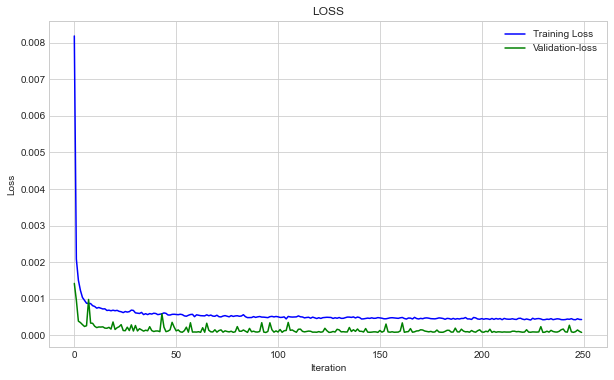

In [24]:
### Plotting iteration-loss graph for training as well as validation
plt.figure(figsize = (10,6))
plt.plot(history.history['loss'],label='Training Loss',color='b')
plt.plot(history.history['val_loss'],label='Validation-loss',color='g')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title('LOSS')
plt.legend()

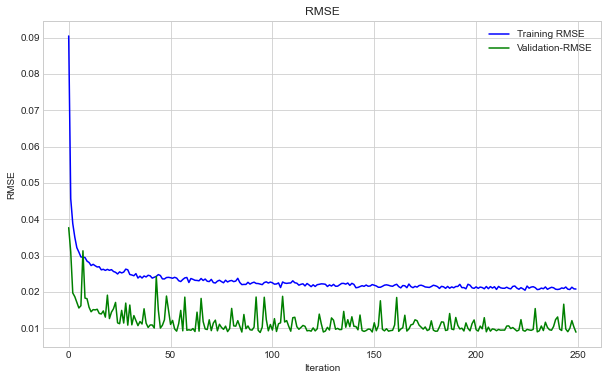

In [25]:
### Plotting iteration-rmse graph for training as well as validation
plt.figure(figsize = (10,6))
plt.plot(history.history['root_mean_squared_error'],label='Training RMSE',color='b')
plt.plot(history.history['val_root_mean_squared_error'],label='Validation-RMSE',color='g')
plt.xlabel("Iteration")
plt.ylabel("RMSE")
plt.title('RMSE')
plt.legend()

In [26]:
#evaluate training data
model.evaluate(x_train,y_train, batch_size = 32)

107/107 [==============================] - 5s 44ms/step - loss: 2.7985e-04 - root_mean_squared_error: 0.0167


[0.00027985277120023966, 0.016728799790143967]

In [27]:
#evaluate testing data
model.evaluate(x_test,y_test, batch_size = 32)

24/24 [==============================] - 1s 41ms/step - loss: 7.9029e-05 - root_mean_squared_error: 0.0089


[7.902858487796038e-05, 0.008889802731573582]

PREDICTION USING TRAINING DATA

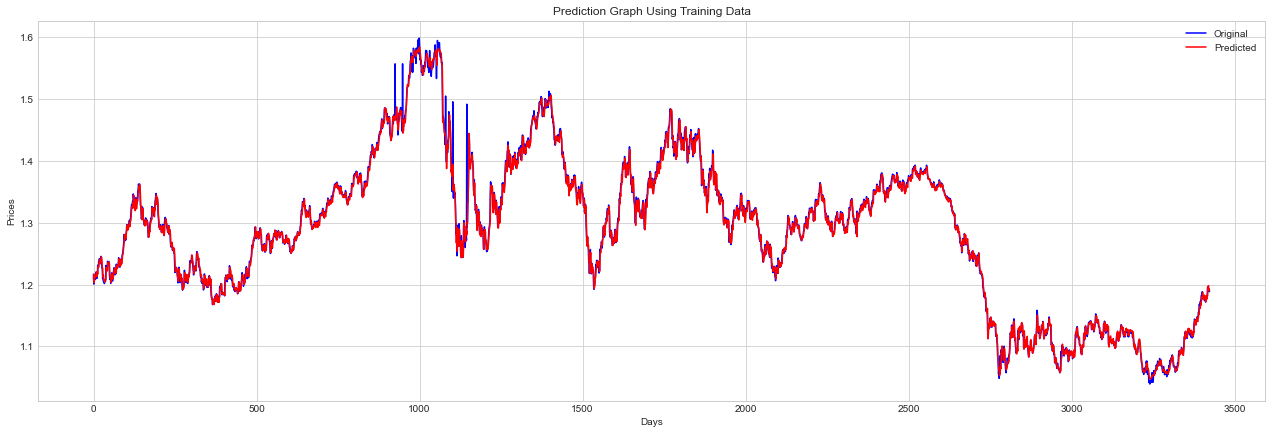

In [15]:
# prediction using training data
train_predict = model.predict(x_train)
plot_y_train = y_train.reshape(-1,1)

# Actual vs predicted training data graph
plt.figure(figsize=(22,7))
plt.plot(scaler.inverse_transform(plot_y_train),color = 'b', label = 'Original')
plt.plot(scaler.inverse_transform(train_predict),color='red', label = 'Predicted')
plt.title("Prediction Graph Using Training Data")
plt.xlabel("Days")
plt.ylabel('Prices')
plt.legend()
plt.show()


PREDICTION USING TESTING DATA

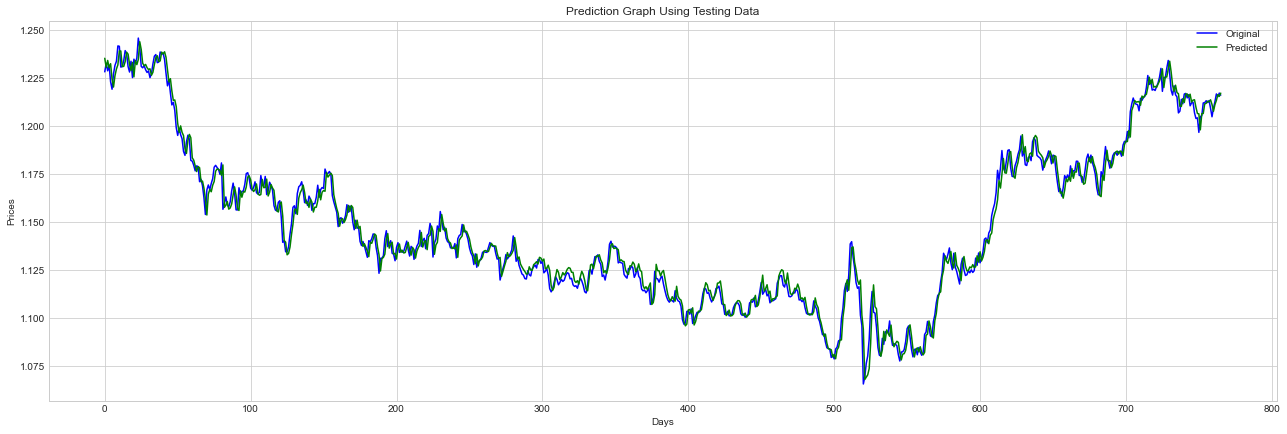

In [16]:
# prediction using testing data
test_predict = model.predict(x_test)
plot_y_test = y_test.reshape(-1,1)

# Actual vs predicted testing data graph
plt.figure(figsize=(22,7))
plt.plot(scaler.inverse_transform(plot_y_test),color = 'b',  label = 'Original')
plt.plot(scaler.inverse_transform(test_predict),color='g', label = 'Predicted')
plt.title("Prediction Graph Using Testing Data")
plt.xlabel("Days")
plt.ylabel('Prices')
plt.legend()
plt.show()

   COMPARING THE LAST 5 ACTUAL VALUES AND THE LAST 5 PREDICTED VALUES

In [30]:
last_actual_five = scaler.inverse_transform(y_test[-5:])
last_predicted_five = scaler.inverse_transform(test_predict[-5:])

In [31]:
compare = pd.DataFrame(last_actual_five, columns = ['Actual_Prices'])
compare['Predicted_Prices'] = last_predicted_five

In [32]:
print(compare)

   Actual_Prices  Predicted_Prices
0       1.212636          1.211097
1       1.216680          1.213288
2       1.215214          1.216312
3       1.217137          1.215384
4       1.216042          1.217093


VISUALIZATION OF THE GRAPH OF HISTORY DATA SETS WITH PREDICTION OF TRAINING AND TESTING DATA

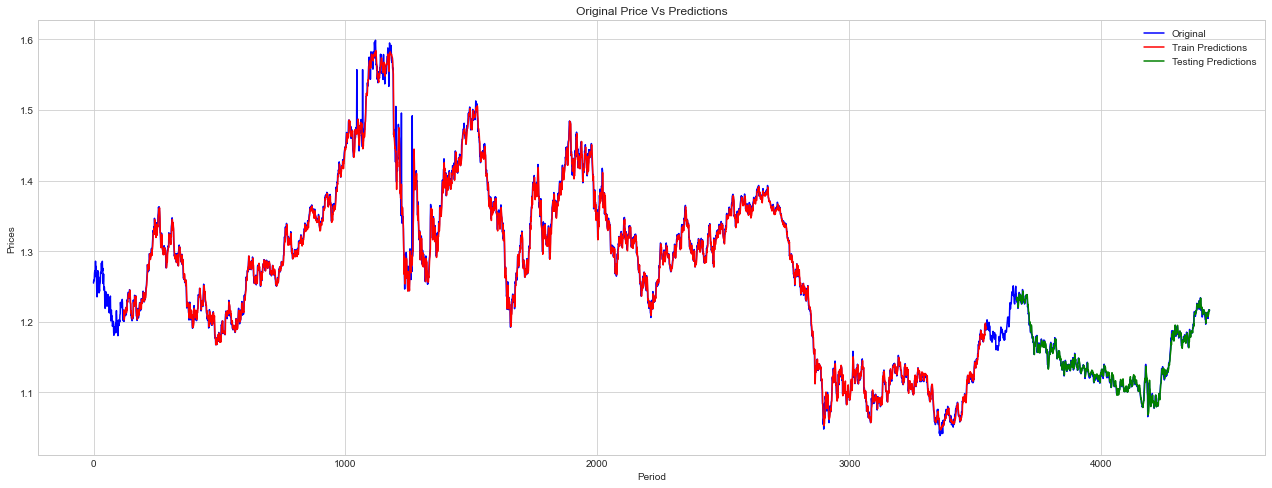

In [33]:
### Plotting 
# shift train predictions for plotting
look_back = time_step
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2):len(data), :] = test_predict
# plot baseline and predictions
plt.figure(figsize=(22,8))
plt.plot(data,color = 'b', label = 'Original')
plt.plot(scaler.inverse_transform(trainPredictPlot),color='red',label = 'Train Predictions')
plt.plot(scaler.inverse_transform(testPredictPlot),color='green', label = 'Testing Predictions')
plt.title("Original Price Vs Predictions")
plt.xlabel('Period')
plt.ylabel('Prices')
plt.legend()
plt.show()



SAVING MODELS FOR THE APPLICATION PURPOSES

In [34]:
model.save('eurusd.h5')

In [3]:
#from keras.models import load_model

In [4]:
#model = load_model('eurusd.h5')